# Sujet 7 : Autour du SARS-CoV-2 (Covid-19) *(Evaluation par pairs)*

## Résumé de l'énoncé

Le but est ici de reproduire des graphes semblables à ceux du South China Morning Post (SCMP), sur la page [The Coronavirus Pandemic](https://www.scmp.com/coronavirus?src=homepage_covid_widget) et qui montrent pour différents pays le nombre cumulé (c'est-à-dire le nombre total de cas depuis le début de l'épidémie) de personnes atteintes de la maladie à coronavirus 2019. Les données sont disponibles à https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv.
Nous créerons un graphe montrant l’évolution du nombre de cas cumulé au cours du temps pour les pays suivants (14 au total): 
+ la Belgique (Belgium) 
+ la Chine - toutes les provinces sauf Hong-Kong (China), 
+ Hong Kong (China, Hong-Kong), 
+ la France métropolitaine (France), 
+ l’Allemagne (Germany), 
+ l’Iran (Iran), 
+ l’Italie (Italy), 
+ le Japon (Japan), 
+ la Corée du Sud (Korea, South), 
+ la Hollande sans les colonies (Netherlands), 
+ le Portugal (Portugal), 
+ l’Espagne (Spain), 
+ le Royaume-Unis sans les colonies (United Kingdom), 
+ les États-Unis (US).

Les graphes auront la date en abscisse et le nombre cumulé de cas à cette date en ordonnée. Nous aurons deux versions de ce graphe, une avec une échelle linéaire et une avec une échelle logarithmique.

## Chargement des données

Nous importons les librairies necessaires pour l'analyse des données dans un premier temps.

In [1]:
%matplotlib inline
import matplotlib, matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
#from matplotlib.dates import DateFormatter
from matplotlib.ticker import ScalarFormatter

import matplotlib.ticker as mticker

Nous chargeons dans un second temps les données dans une variable Python (utilisant la structure de données *panda*).

In [2]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
raw_data = pd.read_csv(data_url)

Ensuite nous chargeons les données des 14 pays.

In [4]:
data_fr = raw_data.loc[(raw_data["Country/Region"]=="France") & raw_data["Province/State"].isna()]
data_be = raw_data.loc[(raw_data["Country/Region"]=="Belgium") & raw_data["Province/State"].isna()]
data_de = raw_data.loc[(raw_data["Country/Region"]=="Germany") & raw_data["Province/State"].isna()]
data_ir = raw_data.loc[(raw_data["Country/Region"]=="Iran") & raw_data["Province/State"].isna()]
data_it = raw_data.loc[(raw_data["Country/Region"]=="Italy") & raw_data["Province/State"].isna()]
data_jp = raw_data.loc[(raw_data["Country/Region"]=="Japan") & raw_data["Province/State"].isna()]
data_kr = raw_data.loc[(raw_data["Country/Region"]=="Korea, South") & raw_data["Province/State"].isna()]
data_nl = raw_data.loc[(raw_data["Country/Region"]=="Netherlands") & raw_data["Province/State"].isna()]
data_pt = raw_data.loc[(raw_data["Country/Region"]=="Portugal") & raw_data["Province/State"].isna()]
data_es = raw_data.loc[(raw_data["Country/Region"]=="Spain") & raw_data["Province/State"].isna()]
data_uk = raw_data.loc[(raw_data["Country/Region"]=="United Kingdom") & raw_data["Province/State"].isna()]
data_us = raw_data.loc[(raw_data["Country/Region"]=="US") & raw_data["Province/State"].isna()]

data_hg = raw_data.loc[(raw_data["Country/Region"]=="China") & (raw_data["Province/State"]=="Hong Kong")]
data_hg[:]["Country/Region"] = "Hong Kong"
data_ch = pd.DataFrame([raw_data.loc[(raw_data["Country/Region"]=="China") & (raw_data["Province/State"]!="Hong Kong")].sum(axis=0)])
data_ch[:]["Country/Region"] = "China"
data_all = [data_fr, data_be, data_de, data_ir, data_jp, data_it, data_kr, data_nl, data_pt, data_es, data_uk, data_us, data_hg, data_ch]

Nous vérifions qu'il n'existe pas d'entrées eronnées dans les données de ces pays.

In [5]:
[(elem.iloc[0]["Country/Region"],elem.iloc[:,4:].isnull().values.any()) for elem in data_all]

[('France', False),
 ('Belgium', False),
 ('Germany', False),
 ('Iran', False),
 ('Japan', False),
 ('Italy', False),
 ('Korea, South', False),
 ('Netherlands', False),
 ('Portugal', False),
 ('Spain', False),
 ('United Kingdom', False),
 ('US', False),
 ('Hong Kong', False),
 ('China', False)]

## Analyse des données

Ensuite nous affichons la courbe du nombre de cas par pays avec une échelle standard.

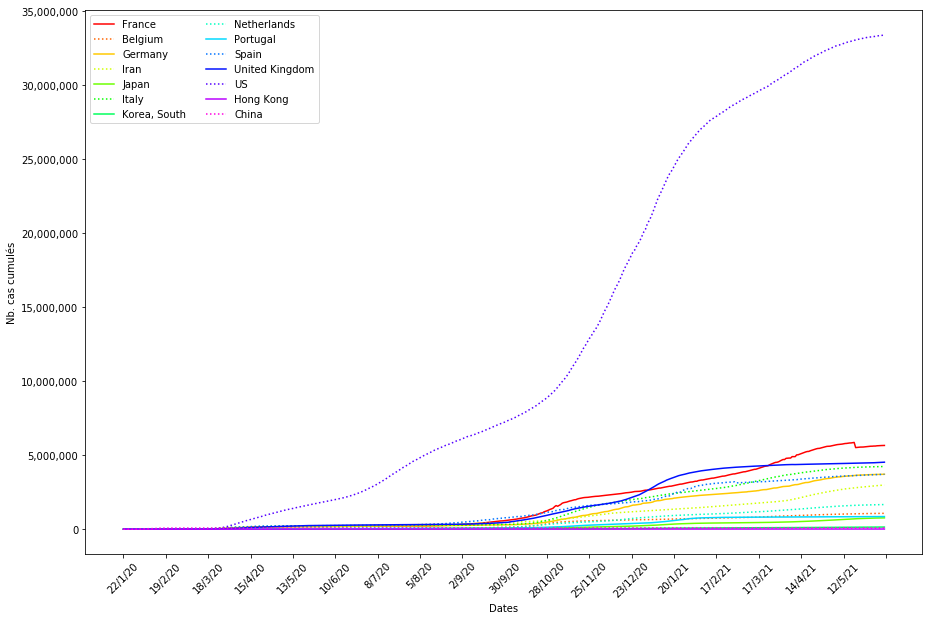

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
lines = []
fmts=["-",":"]
for i,elem in zip(range(14),data_all):
    name = elem.iloc[0]["Country/Region"]
    elem = elem.iloc[:,4:].transpose()
    elem = elem.rename(index=lambda x: x.split("/")[1]+str("/")+x.split("/")[0]+"/"+x.split("/")[-1])
    elem.columns = [name]
    lines += ax.plot(elem,fmts[i%2], label = name, color=plt.cm.hsv(i/15))
#plt.yscale('symlog')
ax.legend(loc=2, ncol=2)
ax.set_xlabel("Dates")
ax.set_ylabel("Nb. cas cumulés")
ax.xaxis.set_major_locator(MultipleLocator(28))
plt.xticks(rotation = 45)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Enfin nous avons une representation des courbes avec une échelle logarithmique.

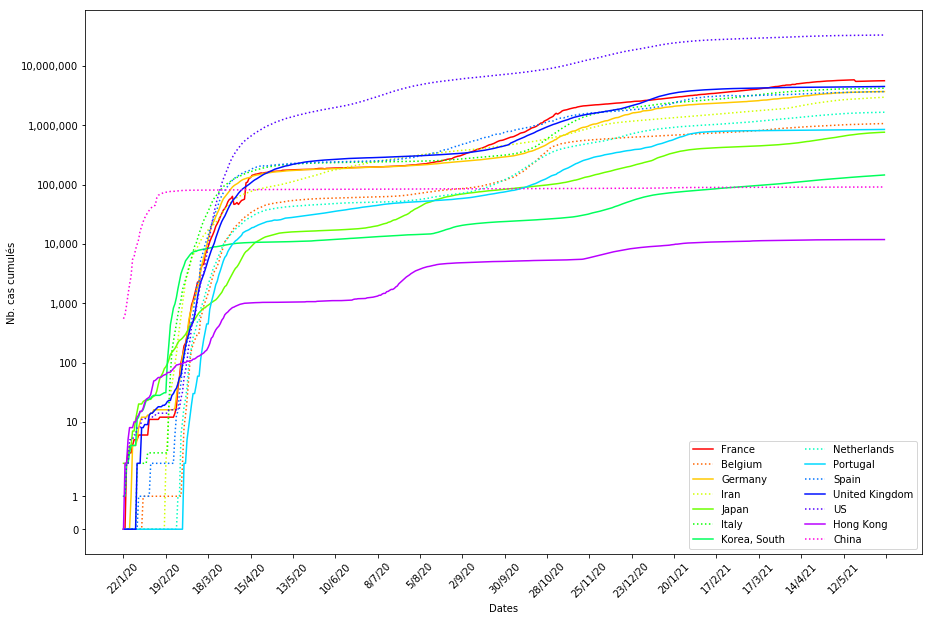

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
lines = []
fmts=["-",":"]
for i,elem in zip(range(14),data_all):
    name = elem.iloc[0]["Country/Region"]
    elem = elem.iloc[:,4:].transpose()
    elem = elem.rename(index=lambda x: x.split("/")[1]+str("/")+x.split("/")[0]+"/"+x.split("/")[-1])
    elem.columns = [name]
    lines += ax.plot(elem,fmts[i%2], label = name, color=plt.cm.hsv(i/15))
plt.yscale('symlog')
ax.legend(loc=4, ncol=2)
ax.set_xlabel("Dates")
ax.set_ylabel("Nb. cas cumulés")
ax.xaxis.set_major_locator(MultipleLocator(28))
plt.xticks(rotation = 45)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))